In [1]:
from pycqed.instrument_drivers.physical_instruments.QuTech_AWG_Module \
    import QuTech_AWG_Module
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

#qwgDevice = "QWG1"
qwgDevice = "QWG2"

ip = None;

if qwgDevice == "QWG1":
    ip = "192.168.0.10"
elif qwgDevice == "QWG2":
    ip = "192.168.0.11"
else:
    raise RuntimeError('Did not select support device')
    exit()

qwg = QuTech_AWG_Module(
    'QWG', address=ip,
    port=5025)

Connected to: QuTech QWG (serial:, firmware:swVersion=0.9beta16-CW_BITS=7-IOB_V2 swBuild=20171109-12:12:51 fwVersion=0.1.14 fwBuild=20171103-15:23:08 kmodVersion=0.79 kmodBuild=20171109-10:22:53) in 0.11s


In [2]:
qwg.reset()

In [3]:
qwg.stop()

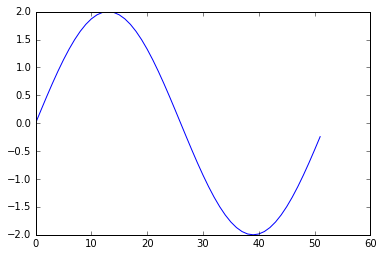

In [4]:
fs = 1e9

# For continuous mode this value should be a multiple of 4e-9
time = 52e-9

length = int(time*fs)
halflength = int(time*fs/2)
waveformSine = np.sin(np.arange(length)*2*np.pi/length)*2
qwg.createWaveformReal('sin', waveformSine)
plt.plot(waveformSine)

In [5]:
qwg.getErrors()

RuntimeError: -224,"Illegal parameter value;(reason='Cannot upload wave; wave has an amplitude lower than: -1.000000; Actual: -2.000000', cmd='wlist:waveform:data ""sin"",#3208')"